# Dataset Exploration for augmentation/other data manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from model.util import *
from imblearn.over_sampling import SMOTE, RandomOverSampler


In [2]:
# Import the dataset
cleanData, _ = preprocess_csv('data/horseData.csv')
cleanData.head()

Shape of dataset: (65150, 24)
number of unique names: 49908
number of unique sires: 50753
number of unique dams: 71785
number of unique bmSires: 73189


,name,form,rating,rawErg,erg,age,sire,fee,crop,dam,ems3,bmSire,damForm,name_encoded,sex_C,sex_F,sex_G,sex_R
1,Aussie Pride,2,86,80,71,8,49908,150000.0,9,50754,57,50107,4,0,0.0,0.0,1.0,0.0
3,Mendelssohn,4,101,73,73,11,49909,30000.0,7,50755,56,71786,0,1,1.0,0.0,0.0,0.0
5,Brother in Arms,1,79,90,91,8,49910,250000.0,11,50756,57,50091,4,2,0.0,0.0,1.0,0.0
7,Gun It,2,97,150,150,10,49911,300000.0,11,5,79,49912,3,3,1.0,0.0,0.0,0.0
8,Declarationofpeace,0,85,127,118,11,49910,150000.0,8,50757,67,71787,0,4,1.0,0.0,0.0,0.0


In [3]:
# Visualize form rating distribution
def plotBeforeChange(feature):
    plt.figure(figsize=(10,6))
    sns.barplot(x=feature.index, y=feature.values, palette='viridis')
    plt.title(f"Distribution of {feature.name}")
    plt.xlabel(f"{feature.name}")
    plt.ylabel('Count')
    plt.show()

# Form

C:\Users\Brandon\AppData\Local\Temp\ipykernel_25680\4049850340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature.index, y=feature.values, palette='viridis')


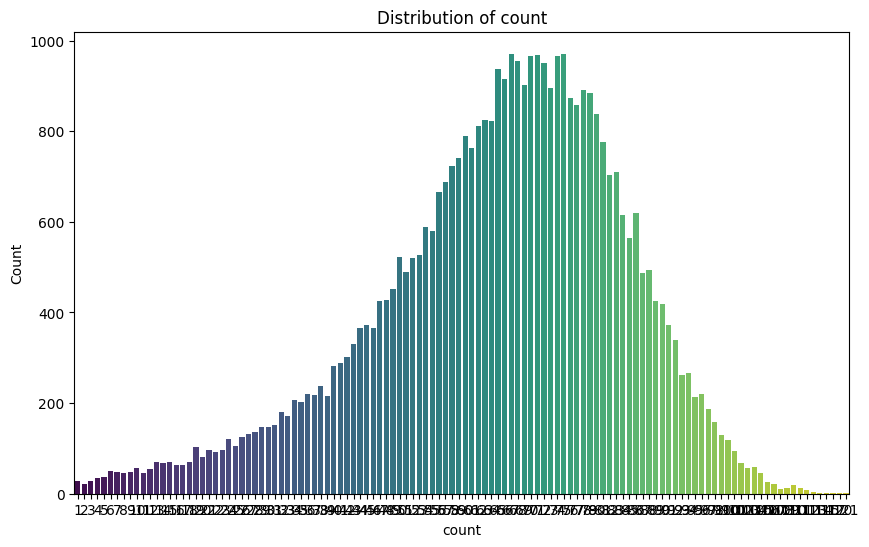

In [ ]:
# Analayze form rating
formCounts = cleanData['form'].value_counts()
plotBeforeChange(formCounts)

Original size: 49974
Resampled size: 173105


C:\Users\Brandon\AppData\Local\Temp\ipykernel_25680\3053580605.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampledFormCounts.index, y=resampledFormCounts.values, palette='viridis')


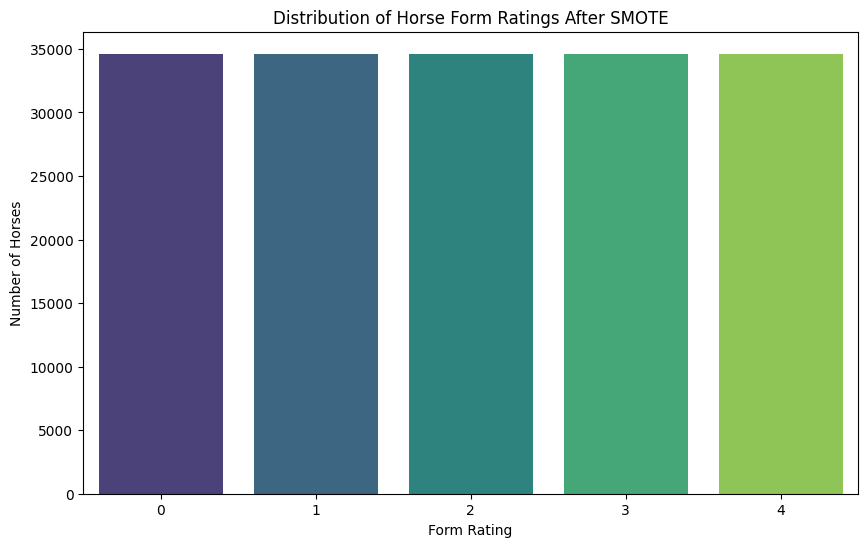

In [5]:
# Attempting to balance the dataset using SMOTE
y = cleanData['form']
X = cleanData.drop(columns=['form', 'name'])

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

resampled_df = pd.DataFrame(X_res, columns=X.columns)
resampled_df['form'] = y_res

# Check the result
print(f"Original size: {len(cleanData)}")
print(f"Resampled size: {len(resampled_df)}")

# Check the new distribution
resampledFormCounts = resampled_df['form'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=resampledFormCounts.index, y=resampledFormCounts.values, palette='viridis')
plt.title('Distribution of Horse Form Ratings After SMOTE')
plt.xlabel('Form Rating')
plt.ylabel('Number of Horses')
plt.show()


# RawERG:

C:\Users\Brandon\AppData\Local\Temp\ipykernel_25680\4049850340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature.index, y=feature.values, palette='viridis')


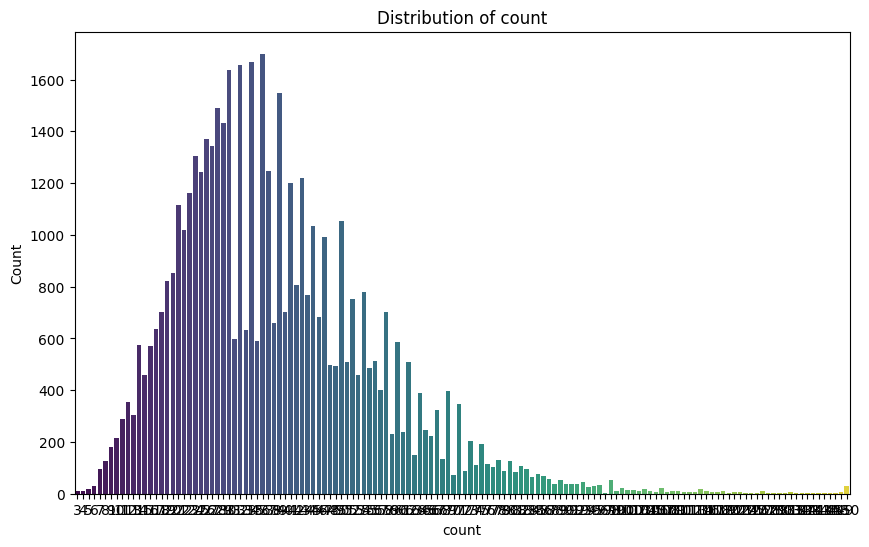

In [6]:
rawErgCount = cleanData['rawErg'].value_counts()
plotBeforeChange(rawErgCount)

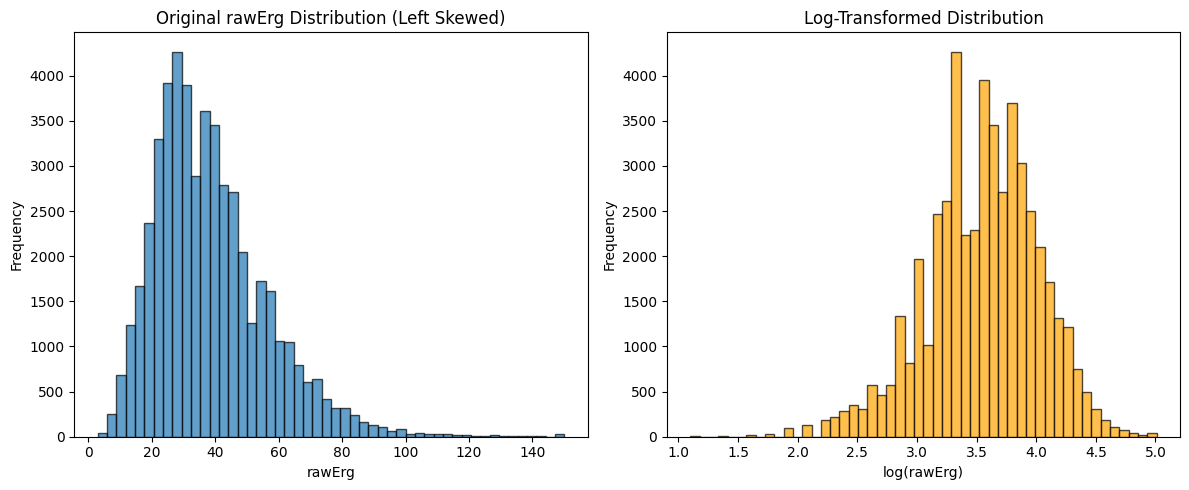

In [7]:
# Applying log transformation to 'rawErg' to reduce skewness
cleanData['logRawErg'] = np.log(cleanData['rawErg'])
newRawErgCount = cleanData['logRawErg'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axes[0].hist(cleanData['rawErg'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Original rawErg Distribution (Left Skewed)')
axes[0].set_xlabel('rawErg')
axes[0].set_ylabel('Frequency')

# Log-transformed distribution
axes[1].hist(cleanData['logRawErg'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Log-Transformed Distribution')
axes[1].set_xlabel('log(rawErg)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

cleanData['rawErg'] = cleanData['logRawErg']
cleanData = cleanData.drop(columns=['logRawErg'])

# Price


C:\Users\Brandon\AppData\Local\Temp\ipykernel_25680\4049850340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature.index, y=feature.values, palette='viridis')


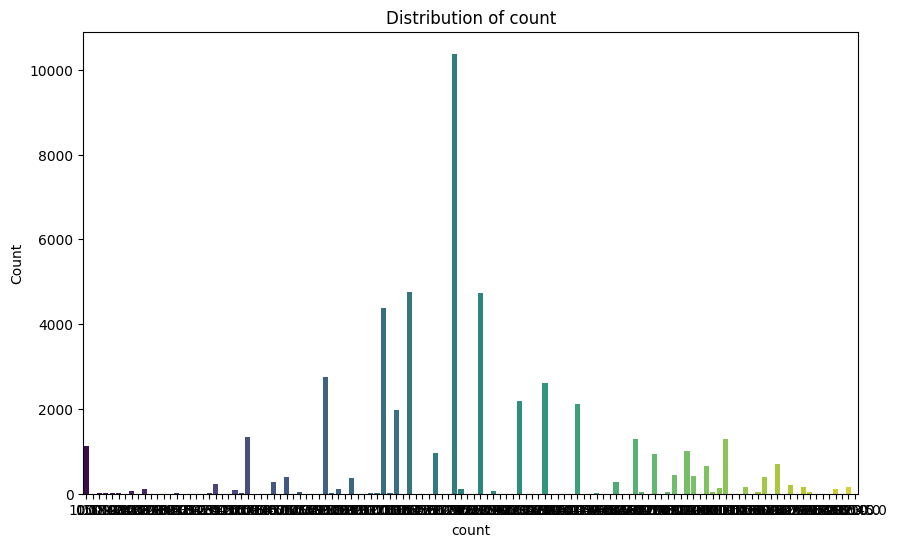

In [8]:
prices = cleanData['fee'].value_counts()
plotBeforeChange(prices)



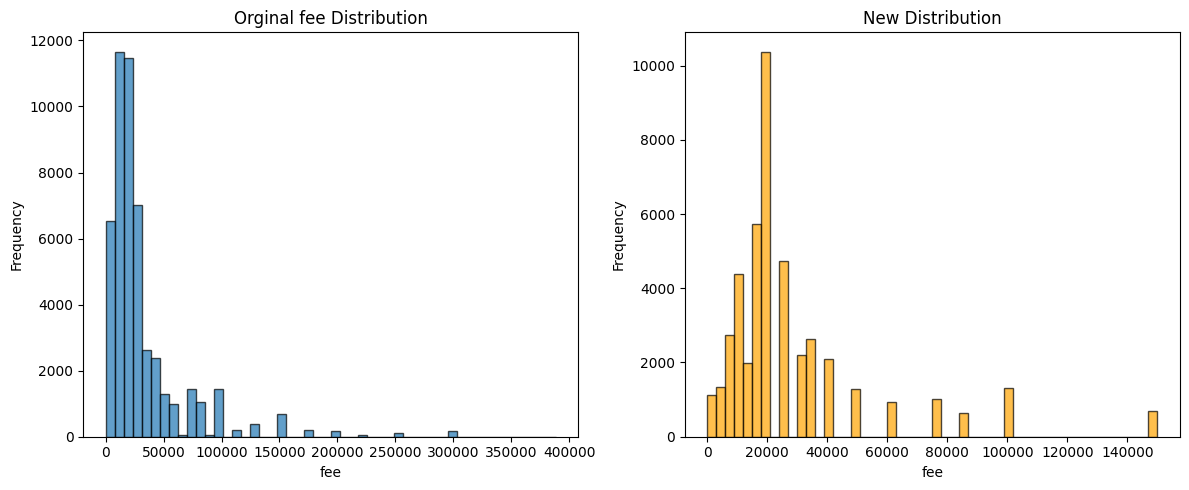

In [9]:
counts = cleanData['fee'].value_counts()

# Keep only values that appear >= 1000 times
valid_values = counts[counts > 500].index

# Filter dataframe
newCleanData = cleanData[cleanData['fee'].isin(valid_values)]



fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original distribution
axes[0].hist(cleanData['fee'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_title('Orginal fee Distribution')
axes[0].set_xlabel('fee')
axes[0].set_ylabel('Frequency')

# New distribution
axes[1].hist(newCleanData['fee'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('New Distribution')
axes[1].set_xlabel('fee')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

    

Original size: 49974
Resampled size: 186786


C:\Users\Brandon\AppData\Local\Temp\ipykernel_25680\71229592.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampledFormCounts.index, y=resampledFormCounts.values, palette='viridis')


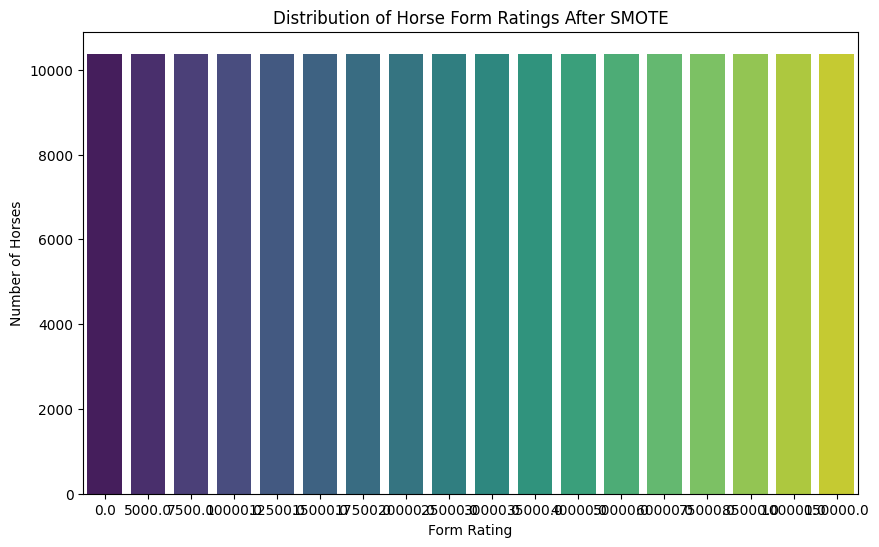

In [10]:
# Applying SMOTE
y = newCleanData['fee']
X = newCleanData.drop(columns=['fee', 'name'])
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

resampled_df = pd.DataFrame(X_res, columns=X.columns)
resampled_df['fee'] = y_res

# Check the result
print(f"Original size: {len(cleanData)}")
print(f"Resampled size: {len(resampled_df)}")

# Check the new distribution
resampledFormCounts = resampled_df['fee'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=resampledFormCounts.index, y=resampledFormCounts.values, palette='viridis')
plt.title('Distribution of Horse Form Ratings After SMOTE')
plt.xlabel('Form Rating')
plt.ylabel('Number of Horses')
plt.show()

# Crop

C:\Users\Brandon\AppData\Local\Temp\ipykernel_25680\4049850340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature.index, y=feature.values, palette='viridis')


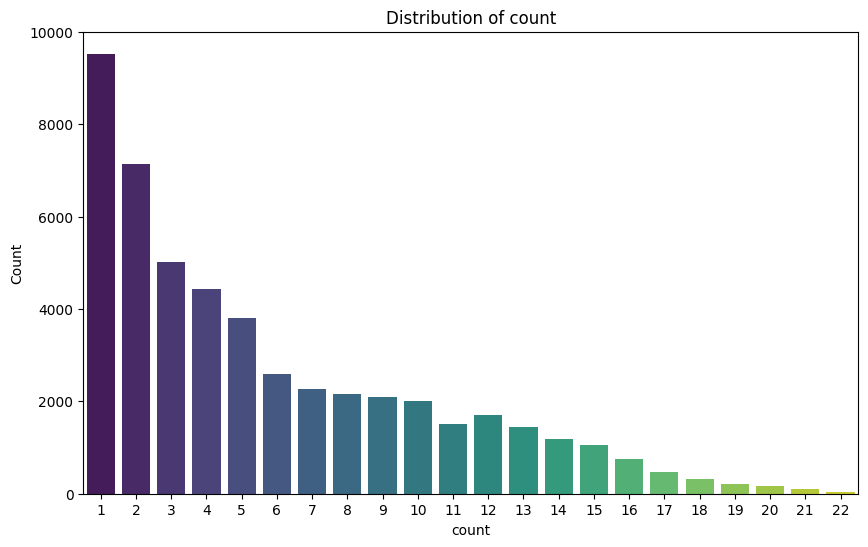

In [11]:
crops = cleanData['crop'].value_counts()
plotBeforeChange(crops)


In [13]:
# Option 1: Keep crops with at least 100 horses (adjust threshold as needed)
crop_counts = resampled_df['crop'].value_counts()

valid_crops = crop_counts[crop_counts >= 2000].index
resampled_df = resampled_df[resampled_df['crop'].isin(valid_crops)]


# damForm

Original size: 41026
Resampled size: 100775


C:\Users\Brandon\AppData\Local\Temp\ipykernel_25680\3582310485.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resampledFormCounts.index, y=resampledFormCounts.values, palette='viridis')


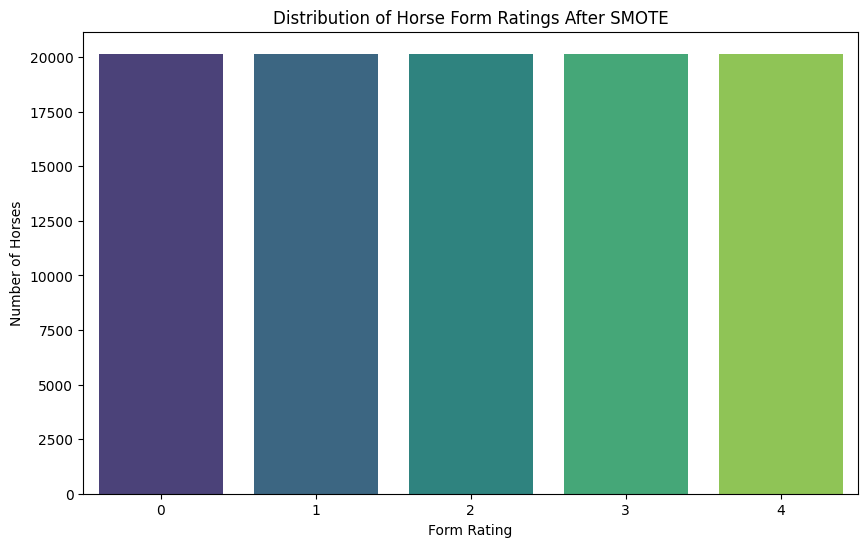

In [15]:
# Attempting to balance the dataset using SMOTE
y = cleanData['damForm']
X = cleanData.drop(columns=['damForm', 'name'])

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

resampled_df = pd.DataFrame(X_res, columns=X.columns)
resampled_df['damForm'] = y_res

# Check the result
print(f"Original size: {len(cleanData)}")
print(f"Resampled size: {len(resampled_df)}")

# Check the new distribution
resampledFormCounts = resampled_df['damForm'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=resampledFormCounts.index, y=resampledFormCounts.values, palette='viridis')
plt.title('Distribution of Horse Form Ratings After SMOTE')
plt.xlabel('Form Rating')
plt.ylabel('Number of Horses')
plt.show()
